In [38]:
import numpy as np
import os,cv2,math,glob,random
import scipy.io as sio
from math import cos, sin
from pathlib import Path
import pandas as pd
import mediapipe
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [2]:
%%capture
if os.path.isfile('AFLW2000-3D.zip') == False:
  !gdown --id  1fP3zvSCYjll_o_m7S12nvQLZ9MnsEoap
  !unzip /content/AFLW2000-3D.zip

Looping among the folder of Images to get a list with images' names, then forming a list with the DataFrame columns

In [3]:
random_image = [Path(f).stem for f in glob.glob("AFLW2000/*.mat")]
print(len(random_image))
column_names = []
for col in range(468):
    column_names.append('x'+str(col))
    column_names.append('y'+str(col))
column_names.append('Pitch')
column_names.append('Yaw')
column_names.append('Roll')
print(len(column_names))
DF = pd.DataFrame(columns=column_names)

2000
939


In [4]:
DF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,Pitch,Yaw,Roll


# Loop the folder to get the values of x,y of every point in every image and adding the labels (pitch,yaw,roll)

In [5]:
j =0
for i in random_image:
    values = {}
    faceModule = mediapipe.solutions.face_mesh
    # loading image and its correspinding mat file
    with faceModule.FaceMesh(static_image_mode=True) as faces:
        # loading the image
        image = cv2.imread('AFLW2000/'+i+'.jpg')
        # processing the face to extract the landmark points (468 point) for each x,y,z
        results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if results.multi_face_landmarks != None: 
            # looping over the faces in the image
            for face in results.multi_face_landmarks:
                k = 0
                for landmark in face.landmark:
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so we will get back their actual value in the image
                    shape = image.shape 
                    relative_x = int(x * shape[1])
                    values['x'+str(k)] = relative_x
                    relative_y = int(y * shape[0])
                    values['y'+str(k)] = relative_y
                    k = k+1
            # loading the mat file to extract the 3 angels of the face (pitch,yaw,roll)
            mat_file = sio.loadmat('AFLW2000/'+i+'.mat')
            # extracting the labels 3 angels
            pose_para = mat_file["Pose_Para"][0][:3]
            pitch = pose_para[0]
            values['Pitch'] = pitch
            yaw = pose_para[1]
            values['Yaw'] = yaw
            roll = pose_para[2]
            values['Roll'] = roll
            DF = DF.append(pd.DataFrame([values]),ignore_index=True)
            j = j+1
            print(j)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [6]:
DF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,Pitch,Yaw,Roll
0,218,309,220,287,220,291,215,253,220,279,...,221,243,225,299,212,304,208,-0.399231,0.018227,0.085676
1,198,288,187,266,201,274,196,245,187,259,...,230,225,231,263,225,267,222,0.470065,1.189533,0.300959
2,143,359,144,349,143,351,139,335,144,345,...,324,147,325,168,320,169,319,-0.18465,0.881137,-0.236852
3,226,312,211,294,220,296,199,265,207,286,...,229,220,233,268,205,271,200,-0.175379,0.299208,-0.373374
4,229,301,221,272,224,281,210,244,219,263,...,219,227,221,271,203,275,201,-0.026812,0.011965,-0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,231,307,239,281,233,287,230,252,240,273,...,226,243,228,283,215,286,213,-0.306358,-0.283822,0.038554
1849,244,310,254,285,247,291,245,253,255,277,...,225,258,227,296,215,300,211,-0.367547,-0.429723,0.122791
1850,263,306,271,282,267,290,271,255,274,274,...,242,292,243,330,246,334,243,-0.156035,0.567114,-0.108536
1851,221,311,225,286,223,292,220,251,226,277,...,223,247,226,303,216,308,213,-0.197102,-0.07043,0.105118


In [7]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1853 entries, 0 to 1852
Columns: 939 entries, x0 to Roll
dtypes: object(939)
memory usage: 13.3+ MB


# Data Normalization

loop over an image to get a center and choosing any 2 points to get the distance between them

0



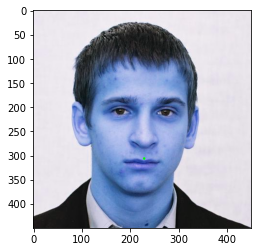

1



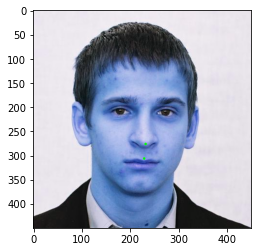

2



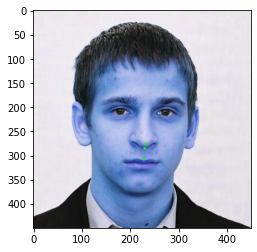

3



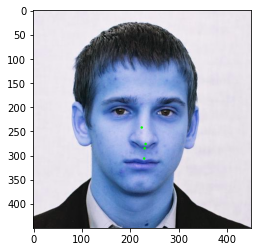

4



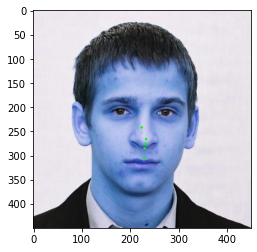

5



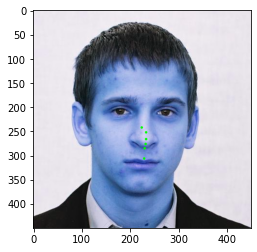

6



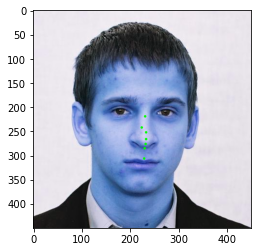

7



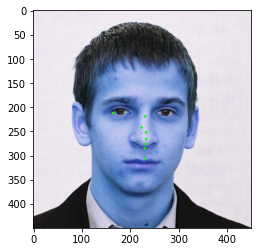

8



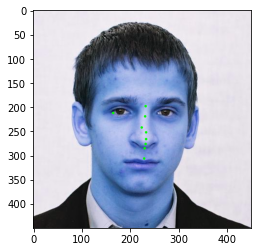

9



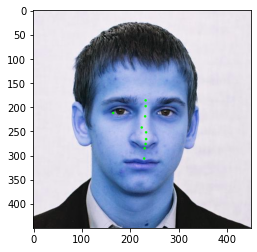

10



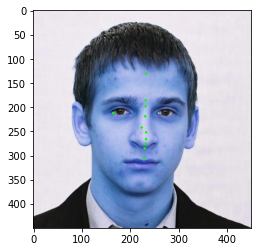

11



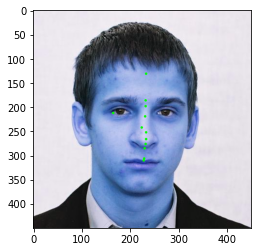

12



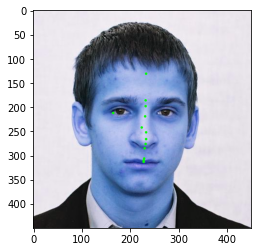

13



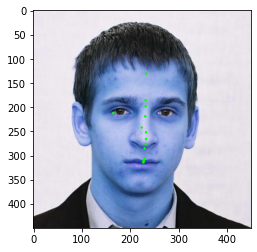

14



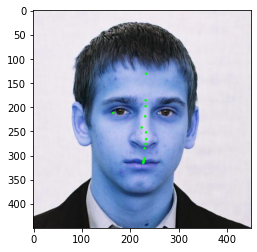

15



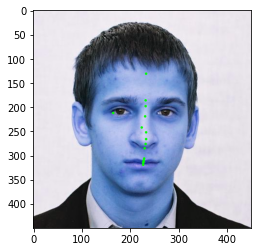

16



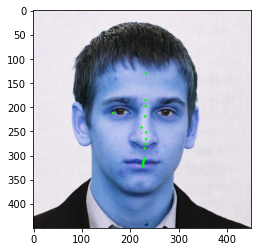

17



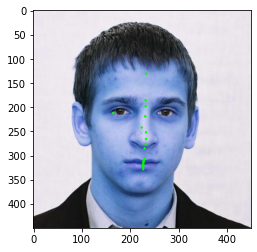

18



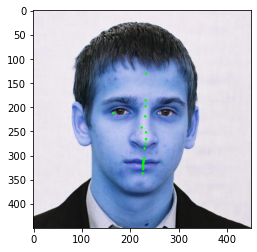

19



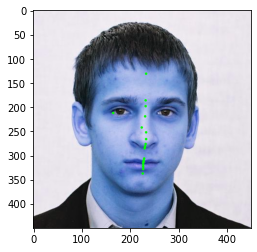

20



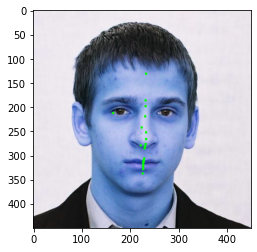

In [41]:
# choosing random image
random_file = 'image00053'
faceModule = mediapipe.solutions.face_mesh
# loading image and its correspinding mat file
with faceModule.FaceMesh(static_image_mode=True) as faces:
    # loading the image
    image = cv2.imread('AFLW2000/'+random_file+'.jpg')
    # processing the face to extract the landmark points (468 point) for each x,y,z
    results = faces.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    if results.multi_face_landmarks != None: 
        # looping over the faces in the image
        for face in results.multi_face_landmarks:
            k = 0
            for landmark in face.landmark:
                if k <= 20 :
                    print(str(k)+'\n')
                    x = landmark.x
                    y = landmark.y
                    # note: the x and y values are scaled to the their width and height so 
                    # we will get back their actual value in the image
                    shape = image.shape 
                    relative_x = int(x * shape[1])
                    relative_y = int(y * shape[0])
                    # cv2.putText(image, str(relative_y), (int(relative_x),int(relative_y)), 
                    # cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
                    cv2.circle(image, (relative_x, relative_y), radius=1, color=(0, 255, 0), thickness=2)
                    plt.imshow(image)
                    plt.show()
                    k = k+1
                else:
                    break

Every Image to have one point as the origin x1,y1 and divide every point by definite distance x0,y0 and x10,y10

In [8]:
p1 = DF['x1']
p2 = DF['y1']
p3 = (((DF['x10']-DF['x0'])**2)+((DF['y10']-DF['y0'])**2))**0.5
for col in column_names:
    if col[0] == 'x':
        DF[col] = (DF[col] - p1)/p3
    if col[0] == 'y':
        DF[col] = (DF[col] - p2)/p3
    else:
        pass

In [9]:
DF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,y464,x465,y465,x466,y466,x467,y467,Pitch,Yaw,Roll
0,-0.011317,0.124487,0.0,0.0,0.0,0.022634,-0.028292,-0.192388,0.0,-0.045268,...,-0.37346,0.130145,-0.350826,0.44702,-0.424386,0.475313,-0.44702,-0.399231,0.018227,0.085676
1,0.095706,0.191413,0.0,0.0,0.121808,0.069605,0.078305,-0.182712,0.0,-0.060904,...,-0.313221,0.330622,-0.304521,0.661245,-0.356724,0.696047,-0.382826,0.470065,1.189533,0.300959
2,-0.014692,0.146916,0.0,0.0,-0.014692,0.029383,-0.073458,-0.205682,0.0,-0.058766,...,-0.36729,0.044075,-0.352598,0.352598,-0.426056,0.36729,-0.440748,-0.18465,0.881137,-0.236852
3,0.101756,0.122108,0.0,0.0,0.061054,0.013568,-0.081405,-0.196729,-0.027135,-0.05427,...,-0.440944,0.061054,-0.413809,0.386674,-0.603754,0.407025,-0.637673,-0.175379,0.299208,-0.373374
4,0.051373,0.186227,0.0,0.0,0.019265,0.057795,-0.070638,-0.179805,-0.012843,-0.057795,...,-0.340345,0.03853,-0.327502,0.321081,-0.443091,0.346767,-0.455935,-0.026812,0.011965,-0.220662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1848,-0.05031,0.163509,0.0,0.0,-0.037733,0.037733,-0.056599,-0.182376,0.006289,-0.05031,...,-0.345885,0.025155,-0.333307,0.276708,-0.415062,0.295574,-0.427639,-0.306358,-0.283822,0.038554
1849,-0.060153,0.150382,0.0,0.0,-0.042107,0.036092,-0.054137,-0.192488,0.006015,-0.048122,...,-0.360916,0.024061,-0.348885,0.252641,-0.421068,0.276702,-0.445129,-0.367547,-0.429723,0.122791
1850,-0.058471,0.175412,0.0,0.0,-0.029235,0.058471,0.0,-0.197338,0.021926,-0.058471,...,-0.292353,0.153485,-0.285044,0.43122,-0.263117,0.460455,-0.285044,-0.156035,0.567114,-0.108536
1851,-0.021859,0.13662,0.0,0.0,-0.01093,0.032789,-0.027324,-0.191268,0.005465,-0.049183,...,-0.344283,0.120226,-0.327888,0.426255,-0.382537,0.453579,-0.398931,-0.197102,-0.07043,0.105118


# Dividing the DataFrame into 2 sets for Trainning and Validation

In [10]:
train_df, val_df = train_test_split(DF, test_size=0.15, random_state=42)

Separate the DataFrame to have training Features and training labelsand same for validation

In [11]:
x_train = train_df.iloc[:,:936]
y_train_pitch = train_df.iloc[:,-3]
y_train_yaw = train_df.iloc[:,-2]
y_train_roll = train_df.iloc[:,-1]
x_val = val_df.iloc[:,:936]
y_val_pitch = val_df.iloc[:,-3]
y_val_yaw = val_df.iloc[:,-2]
y_val_roll = val_df.iloc[:,-1]

# 3 Training Models for each position 

Setting Model Parameters 

In [12]:
svr_parameters = {'kernel': ['rbf'],'C': [0.01, 0.1, 1 , 10, 100],'gamma': [0.01, 0.1, 1, 10, 100]}

Pitch Model 

In [13]:
svm_pitch = SVR()
svm_gs_pitch = GridSearchCV(estimator = svm_pitch,param_grid = svr_parameters,scoring='neg_mean_absolute_error')
svm_gs_pitch.fit(x_train, y_train_pitch)

svm_winner_pitch = svm_gs_pitch.best_estimator_
print(svm_winner_pitch.score(x_val, y_val_pitch))
svm_winner_pitch

0.70859561345567


SVR(C=10, gamma=0.01)

In [14]:
mean_absolute_error(y_val_pitch, svm_winner_pitch.predict(x_val))

0.08622631260624314

In [15]:
mean_absolute_error(y_train_pitch, svm_winner_pitch.predict(x_train))

0.09746733959686735

Yaw Model

In [16]:
svm_yaw = SVR()
svm_gs_yaw = GridSearchCV(estimator = svm_yaw,param_grid = svr_parameters,scoring='neg_mean_absolute_error')
svm_gs_yaw.fit(x_train, y_train_yaw)

svm_winner_yaw = svm_gs_yaw.best_estimator_
print(svm_winner_yaw.score(x_val, y_val_yaw))
svm_winner_yaw

0.9415487910570773


SVR(C=10, gamma=0.01)

In [17]:
mean_absolute_error(y_val_yaw, svm_winner_yaw.predict(x_val))

0.06591065227748333

In [18]:
mean_absolute_error(y_train_yaw, svm_winner_yaw.predict(x_train))

0.0706400461309183

Roll Model

In [19]:
svm_roll = SVR()
svm_gs_roll = GridSearchCV(estimator = svm_roll,param_grid = svr_parameters,scoring='neg_mean_absolute_error')
svm_gs_roll.fit(x_train, y_train_roll)

svm_winner_roll = svm_gs_roll.best_estimator_
print(svm_winner_roll.score(x_val, y_val_roll))
svm_winner_roll

0.817516314167739


SVR(C=1, gamma=0.01)

In [20]:
mean_absolute_error(y_val_roll, svm_winner_roll.predict(x_val))

0.06027497012932664

In [21]:
mean_absolute_error(y_train_roll, svm_winner_roll.predict(x_train))

0.08180272815550677

# DataFrame Preparation for Testing Video

In [22]:
column_namess = []
for col in range(468):
    column_namess.append('x'+str(col))
    column_namess.append('y'+str(col))
DFF = pd.DataFrame(columns = column_namess)
DFF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467


# Looping over the video to have Frames and get 468 points of each 

In [23]:
cap = cv2.VideoCapture('HPEE.mp4')
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Check if camera opened successfully
if (cap.isOpened()== False): 
    print("Error opening video file")
# initializing a list to store the frames   
img_array = []
# Read until video is completed\
j = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        with faceModule.FaceMesh(static_image_mode=True) as face:
            img_array.append(frame)
            # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
            results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            if results.multi_face_landmarks != None:
                values = {}
                # looping over the faces in the frame
                for face in results.multi_face_landmarks:
                    k = 0
                    for landmark in face.landmark:
                        x = landmark.x
                        y = landmark.y
                        # note: the x and y values are scaled to the their width and height 
                        # so we will get back their actual value in the image
                        shape = image.shape 
                        relative_x = int(x * shape[1])
                        values['x'+str(k)] = relative_x
                        relative_y = int(y * shape[0])
                        values['y'+str(k)] = relative_y
                        k = k+1
            DFF = DFF.append(pd.DataFrame([values]),ignore_index=True)
            j = j+1
            print(j) 
    else:
        break
cap.release()  
# Closes all the frames
cv2.destroyAllWindows()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [24]:
DFF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,234,192,234,169,234,176,230,148,233,162,...,240,132,238,134,237,135,256,128,258,126
1,234,190,233,166,233,174,229,145,233,159,...,240,131,238,132,237,133,255,126,257,125
2,234,189,233,166,233,173,229,145,233,159,...,240,130,238,132,237,132,255,125,257,124
3,234,189,233,166,233,174,229,145,233,159,...,240,131,238,132,237,133,256,126,258,125
4,234,189,234,165,234,173,230,145,233,158,...,240,130,238,132,237,132,256,126,258,125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,239,168,239,145,239,155,235,128,238,139,...,246,119,244,120,243,120,262,117,264,115
702,240,168,239,145,239,154,235,127,239,138,...,246,119,244,120,243,120,262,118,264,116
703,239,168,238,144,239,154,235,127,238,138,...,246,120,244,120,243,120,262,118,264,116
704,240,169,239,146,239,155,235,128,239,139,...,246,119,244,120,243,120,262,117,264,115


# Normalization of Testing Dataset as Trainning Data

In [25]:
pp1 = DFF['x1']
pp2 = DFF['y1']
pp3 = (((DFF['x10']-DFF['x0'])**2)+((DFF['y10']-DFF['y0'])**2))**0.5
for col in column_namess:
    if col[0] == 'x':
        DFF[col] = (DFF[col] - pp1)/pp3
    if col[0] == 'y':
        DFF[col] = (DFF[col] - pp2)/pp3
    else:
        pass

In [26]:
DFF

,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,...,x463,y463,x464,y464,x465,y465,x466,y466,x467,y467
0,0.0,0.208953,0.0,0.0,0.0,0.063594,-0.03634,-0.190783,-0.009085,-0.063594,...,0.054509,-0.336141,0.03634,-0.317972,0.027255,-0.308887,0.199868,-0.372481,0.218038,-0.390651
1,0.009003,0.216076,0.0,0.0,0.0,0.072025,-0.036013,-0.189066,0.0,-0.063022,...,0.063022,-0.315111,0.045016,-0.306108,0.036013,-0.297104,0.19807,-0.360127,0.216076,-0.36913
2,0.009003,0.207073,0.0,0.0,0.0,0.063022,-0.036013,-0.189066,0.0,-0.063022,...,0.063022,-0.324114,0.045016,-0.306108,0.036013,-0.306108,0.19807,-0.36913,0.216076,-0.378133
3,0.009003,0.207073,0.0,0.0,0.0,0.072025,-0.036013,-0.189066,0.0,-0.063022,...,0.063022,-0.315111,0.045016,-0.306108,0.036013,-0.297104,0.207073,-0.360127,0.225079,-0.36913
4,0.0,0.218038,0.0,0.0,0.0,0.072679,-0.03634,-0.181698,-0.009085,-0.063594,...,0.054509,-0.317972,0.03634,-0.299802,0.027255,-0.299802,0.199868,-0.354311,0.218038,-0.363396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,0.0,0.237063,0.0,0.0,0.0,0.103071,-0.041228,-0.17522,-0.010307,-0.061843,...,0.07215,-0.267984,0.051535,-0.257677,0.041228,-0.257677,0.237063,-0.288598,0.257677,-0.309213
702,0.010199,0.234584,0.0,0.0,0.0,0.091794,-0.040797,-0.183587,0.0,-0.071395,...,0.071395,-0.265182,0.050997,-0.254983,0.040797,-0.254983,0.234584,-0.275381,0.254983,-0.29578
703,0.010199,0.244783,0.0,0.0,0.010199,0.101993,-0.030598,-0.173388,0.0,-0.061196,...,0.081594,-0.244783,0.061196,-0.244783,0.050997,-0.244783,0.244783,-0.265182,0.265182,-0.285581
704,0.010199,0.234584,0.0,0.0,0.0,0.091794,-0.040797,-0.183587,0.0,-0.071395,...,0.071395,-0.275381,0.050997,-0.265182,0.040797,-0.265182,0.234584,-0.29578,0.254983,-0.316178


Predict the position using the Models

In [27]:
pred_pitch = svm_winner_pitch.predict(DFF)
pred_yaw = svm_winner_yaw.predict(DFF)
pred_roll = svm_winner_roll.predict(DFF)

# Drawing axis Fuction for the Prediction of Pitch, Yaw, Roll

In [28]:
def draw_axis(img,pitch, yaw,  roll, tdx=None, tdy=None, size = 100):
    yaw=-yaw
    if tdx != None and tdy != None:
        tdx = tdx
        tdy = tdy
    else:
        height, width = img.shape[:2]
        tdx = width / 2
        tdy = height / 2
    # X-Axis pointing to right. drawn in red
    x1 = size * (cos(yaw) * cos(roll)) + tdx
    y1 = size * (cos(pitch) * sin(roll) + cos(roll) * sin(pitch) * sin(yaw)) + tdy

    # Y-Axis | drawn in green
    x2 = size * (-cos(yaw) * sin(roll)) + tdx
    y2 = size * (cos(pitch) * cos(roll) - sin(pitch) * sin(yaw) * sin(roll)) + tdy

    # Z-Axis (out of the screen) drawn in blue
    x3 = size * (sin(yaw)) + tdx
    y3 = size * (-cos(yaw) * sin(pitch)) + tdy

    cv2.line(img, (int(tdx), int(tdy)), (int(x1),int(y1)),(0,0,255),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x2),int(y2)),(0,255,0),3)
    cv2.line(img, (int(tdx), int(tdy)), (int(x3),int(y3)),(255,0,0),2)

    return img

looping over the video to get frames and center points and draw axis with the prediction 

In [29]:
cap = cv2.VideoCapture('HPEE.mp4')
width= int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height= int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
# Check if camera opened successfully
if (cap.isOpened()== False): 
      print("Error opening video file")
# initializing a list to store the frames   
img_final = []
# Read until video is completed
i = 0
while(cap.isOpened()):
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        with faceModule.FaceMesh(static_image_mode=True) as face:
            # processing the image to detect the face and then generating the land marks (468 for each x,y,z).
            results = face.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            if results.multi_face_landmarks != None:
                for face in results.multi_face_landmarks:
                    # initializing X and Y lists to store the spacial coordinates of the points
                    X = []
                    Y = []
                    # looping over the landmarks to extract x and y
                    for j,landmark in enumerate(face.landmark):
                        x = landmark.x
                        y = landmark.y
                        # retrieve the true values of x and y
                        shape = frame.shape 
                        relative_x = int(x * shape[1])
                        relative_y = int(y * shape[0])
                        X.append(relative_x)
                        Y.append(relative_y)
                X = np.array(X)
                Y = np.array(Y)
                draw_axis(frame,pred_pitch[i],pred_yaw[i],pred_roll[i],X[1],Y[1])
                # appending the result frame to the img_array list
                img_final.append(frame)
                i += 1
    else: 
        break
cap.release()  
# Closes all the frames
cv2.destroyAllWindows()

Saving the frames list and get the video with the drawn axis 

In [31]:
out = cv2.VideoWriter('out_final.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, (width,height))
for i in range(len(img_final)):
    out.write(img_final[i])
out.release()